# Image Processing with scikit-image

In [1]:
# import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# show image function
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
# show comparison of 2 or 3 image
def show_comparison(image1, image2, title1='title1', title2='title2', cmap_type='gray'):
    fig, axarr = plt.subplots(1,2, figsize=(10,5))
    for aa in axarr:
        aa.set_axis_off()

    axarr[0].imshow(image1, cmap=cmap_type)
    axarr[1].imshow(image2, cmap=cmap_type)

    axarr[0].set_title(title1)
    axarr[1].set_title(title2)
    

    plt.show()

def show_three(image1, image2, image3, title1='title1', title2='title2', title3='title3', cmap_type='gray'):
    
    fig, axarr = plt.subplots(1,3, figsize=(10,5))
    for aa in axarr:
        aa.set_axis_off()

    axarr[0].imshow(image1, cmap=cmap_type)
    axarr[1].imshow(image2, cmap=cmap_type)
    axarr[2].imshow(image3, cmap=cmap_type)

    axarr[0].set_title(title1)
    axarr[1].set_title(title2)
    axarr[2].set_title(title3)
    plt.show()

## Images in scikit-image

<class 'numpy.ndarray'>


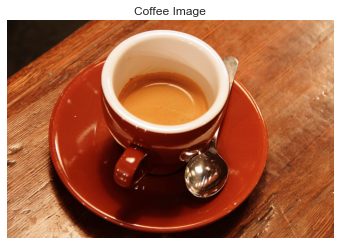

In [4]:
from skimage import data

# coffee image
coffee_image = data.coffee()

print(type(coffee_image))

show_image(coffee_image, 'Coffee Image')

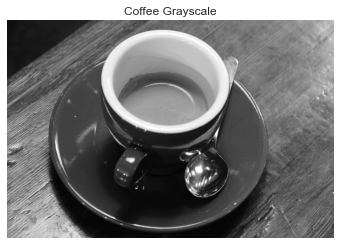

In [5]:
# coloring
from skimage import color

coffee_grayscale = color.rgb2gray(coffee_image)
show_image(coffee_grayscale, 'Coffee Grayscale')

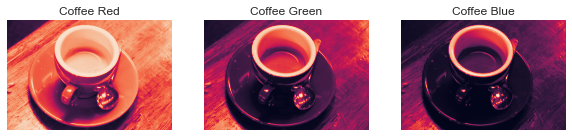

In [16]:
# coffee_image RGB value
coffee_red = coffee_image[:,:,0]
coffee_green = coffee_image[:,:,1]
coffee_blue = coffee_image[:,:,2]

# create figure
fig, axarr = plt.subplots(1,3, figsize=(10,5))
for aa in axarr:
        aa.set_axis_off()
axarr[0].imshow(coffee_red)
axarr[1].imshow(coffee_green)
axarr[2].imshow(coffee_blue)

axarr[0].set_title('Coffee Red')
axarr[1].set_title('Coffee Green')
axarr[2].set_title('Coffee Blue')

plt.show()

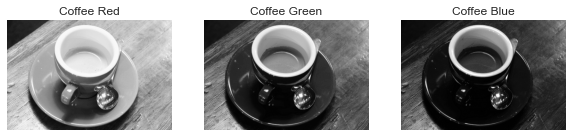

In [7]:
# show_rgb
show_three(coffee_red, coffee_green, coffee_blue, 'Coffee Red', 'Coffee Green', 'Coffee Blue')

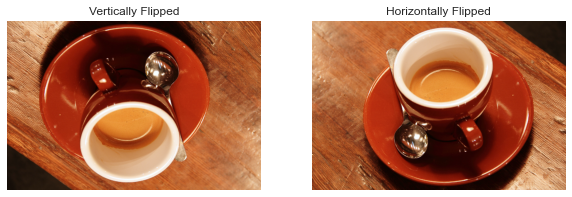

In [8]:
# fliping image
coffee_ver = np.flipud(coffee_image)
coffee_hor = np.fliplr(coffee_image)

show_comparison(coffee_ver, coffee_hor, 'Vertically Flipped', 'Horizontally Flipped')

## Histograms in images

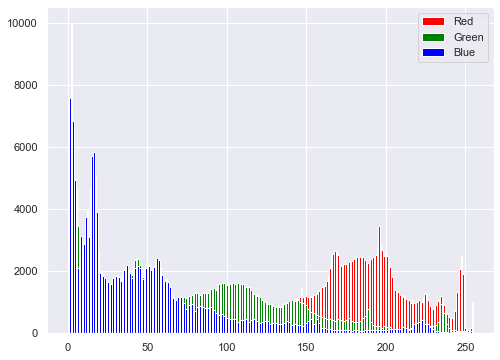

In [9]:
plt.figure(figsize=(8,6))
plt.hist(coffee_red.ravel(), bins=256, color='red', label='Red')
plt.hist(coffee_green.ravel(), bins=256, color='green', label='Green')
plt.hist(coffee_blue.ravel(), bins=256, color='blue', label='Blue')
plt.legend()
plt.show()

## Thresholding
- Simplest method of image segmentation

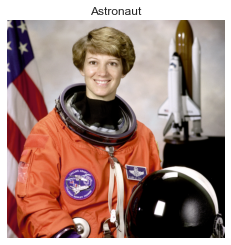

In [10]:
# astronaut image
astronaut = data.astronaut()
show_image(astronaut, 'Astronaut')

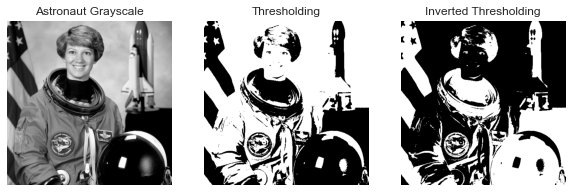

In [11]:
# apply thresh
from skimage.filters import threshold_otsu

astronaut_grayscale = color.rgb2gray(astronaut)
thresh = threshold_otsu(astronaut_grayscale)

binary_global = astronaut_grayscale > thresh
inv_binary_global = astronaut_grayscale <= thresh

show_three(astronaut_grayscale, binary_global, inv_binary_global, 'Astronaut Grayscale', 'Thresholding', 'Inverted Thresholding')


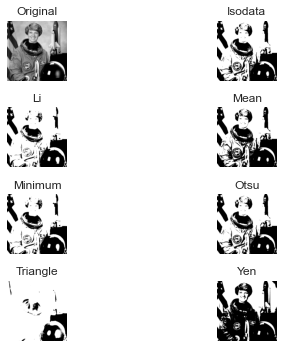

In [12]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(astronaut_grayscale, verbose=False)

## Image Filtering

### Edge Detection with sobel

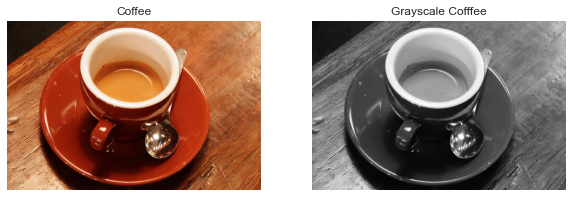

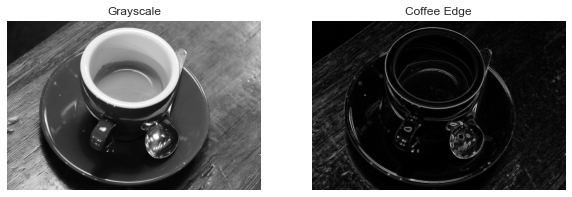

In [13]:
# edge detection with sobel
from skimage.filters import sobel

# coffe image
show_comparison(coffee_image, coffee_grayscale, 'Coffee', 'Grayscale Cofffee')
# cat_edge
coffee_edge = sobel(coffee_grayscale)

show_comparison(coffee_grayscale, coffee_edge, 'Grayscale', 'Coffee Edge')

### Smoothing

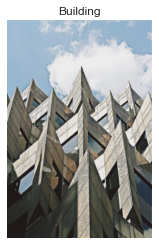

In [14]:
import skimage.io

image = skimage.io.imread('data/img/chapter 2/building_image.jpg')
show_image(image, 'Building')

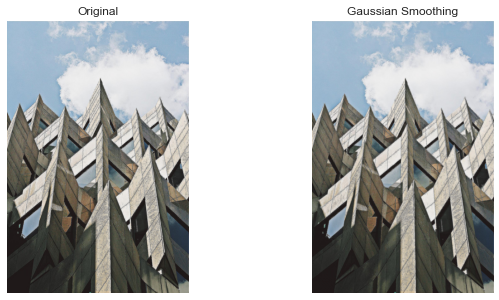

In [15]:
from skimage.filters import gaussian

gaussian_image = gaussian(image, multichannel=True)

show_comparison(image, gaussian_image, 'Original', 'Gaussian Smoothing')

## Image enhancement

In [17]:
# enhancement using histogram equalizer
from skimage import exposure

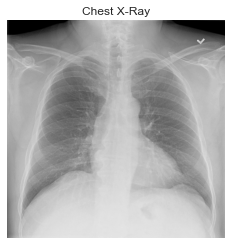

In [19]:
xray = skimage.io.imread('data/img/chapter 2/chest_xray_image.png')
show_image(xray, 'Chest X-Ray')

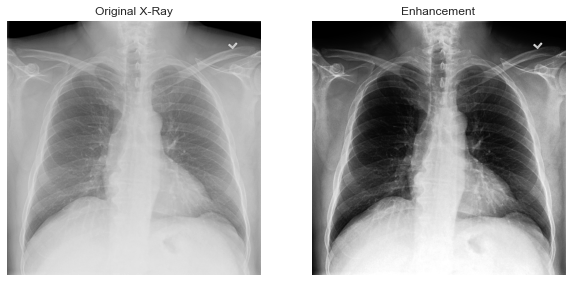

In [20]:
xray_eq = exposure.equalize_hist(xray)

show_comparison(xray, xray_eq, 'Original X-Ray', 'Enhancement')

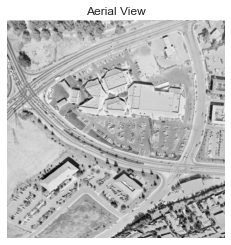

In [21]:
aerial = skimage.io.imread('data/img/chapter 2/image_aerial.tiff')
show_image(aerial, 'Aerial View')

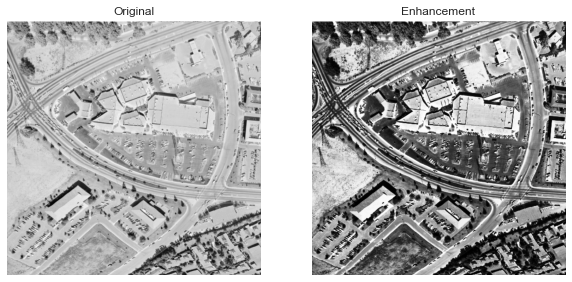

In [22]:
aerial_eq = exposure.equalize_hist(aerial)

show_comparison(aerial, aerial_eq, 'Original', 'Enhancement')

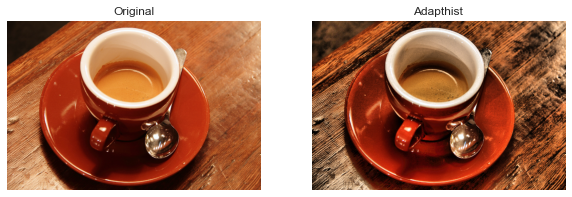

In [23]:
# Adapthist eqalize
coffee_adapthist = exposure.equalize_adapthist(coffee_image, clip_limit=0.03)

show_comparison(coffee_image, coffee_adapthist, 'Original', 'Adapthist')

## Image Transformation

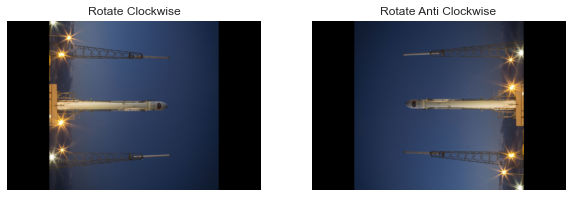

In [25]:
# rotating image
from skimage.transform import rotate

rocket_img = data.rocket()

# rotate image 90 degrees clockwise (right)
rocket_cw = rotate(rocket_img, -90)

# rotate image 90 degrees anti clockwise (left)
rocket_acw = rotate(rocket_img, 90)

show_comparison(rocket_cw, rocket_acw, 'Rotate Clockwise', 'Rotate Anti Clockwise')

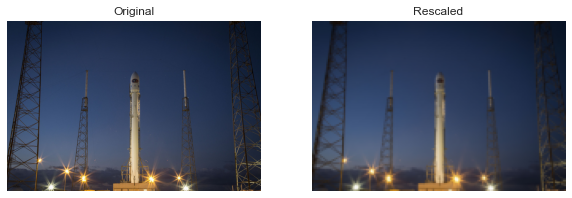

In [27]:
# rescaling
from skimage.transform import rescale

rocket_rescaled = rescale(rocket_img, 1/4, anti_aliasing=True, multichannel=True)

show_comparison(rocket_img, rocket_rescaled, 'Original', 'Rescaled')

## Morphology

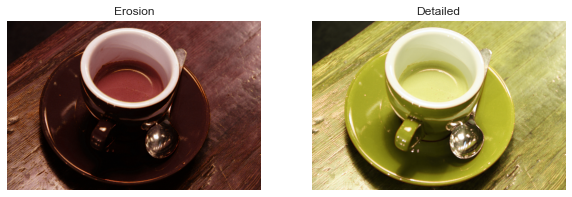

In [52]:
from skimage import morphology

detailed = morphology.dilation(coffee_image)
erosion = morphology.erosion(coffee_image)
show_comparison(erosion, detailed, 'Erosion', 'Detailed')